# EDA of CPJ Data on Journalists Killed since 1992

In [1]:
# %load ~/jupyter_imports.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# make plots look nice
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 'large'
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'
plt.rcParams['lines.linewidth'] = 3


In [2]:
cpj = pd.read_csv('../data/Journalists Killed between 1992 and 2020.csv')
cpj.head()

,year,combinedStatus,fullName,sortName,primaryNationality,secondaryNationality,tertiaryNationality,gender,photoUrl,photoCredit,...,threatened,charges,motive,lengthOfSentence,healthProblems,impCountry,entry,sentenceDate,sentence,locationImprisoned
0,2006,Confirmed,Ahmad [full name unavailable],NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007,Confirmed,Khaled Mohammad Nofan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007,Confirmed,Sabah Salman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005,Confirmed,Unidentified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,Confirmed,Abadullah Hananzai,NaN,Afghanistan,NaN,NaN,Male,NaN,NaN,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
cpj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033 entries, 0 to 2032
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      2033 non-null   int64  
 1   combinedStatus            2033 non-null   object 
 2   fullName                  2033 non-null   object 
 3   sortName                  0 non-null      float64
 4   primaryNationality        1313 non-null   object 
 5   secondaryNationality      4 non-null      object 
 6   tertiaryNationality       0 non-null      float64
 7   gender                    1459 non-null   object 
 8   photoUrl                  431 non-null    object 
 9   photoCredit               267 non-null    object 
 10  type                      2033 non-null   object 
 11  lastStatus                231 non-null    object 
 12  typeOfDeath               1369 non-null   object 
 13  status                    2033 non-null   object 
 14  employed

In [4]:
# drop columns with all nulls
drop_cols=['sortName','secondaryNationality','tertiaryNationality','charges','motive','lengthOfSentence','healthProblems','impCountry','entry','sentenceDate','sentence','locationImprisoned']
cpj.drop(drop_cols,axis=1,inplace=True)
cpj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033 entries, 0 to 2032
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   year                      2033 non-null   int64 
 1   combinedStatus            2033 non-null   object
 2   fullName                  2033 non-null   object
 3   primaryNationality        1313 non-null   object
 4   gender                    1459 non-null   object
 5   photoUrl                  431 non-null    object
 6   photoCredit               267 non-null    object
 7   type                      2033 non-null   object
 8   lastStatus                231 non-null    object
 9   typeOfDeath               1369 non-null   object
 10  status                    2033 non-null   object
 11  employedAs                2025 non-null   object
 12  organizations             2032 non-null   object
 13  jobs                      1398 non-null   object
 14  coverage                

What is difference between 'combinedStatus','status', and 'lastStatus?

In [5]:
cpj['combinedStatus'].value_counts()

Confirmed      1473
Unconfirmed     550
Killed           10
Name: combinedStatus, dtype: int64

In [6]:
cpj['status'].value_counts()

Killed    2033
Name: status, dtype: int64

In [7]:
cpj['lastStatus'].value_counts()

Killed    231
Name: lastStatus, dtype: int64

Status and lastStatus don't seem to contain any useful information, so drop those columns.

In [8]:
cpj.drop(['status','lastStatus'],axis=1,inplace=True)
cpj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033 entries, 0 to 2032
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   year                      2033 non-null   int64 
 1   combinedStatus            2033 non-null   object
 2   fullName                  2033 non-null   object
 3   primaryNationality        1313 non-null   object
 4   gender                    1459 non-null   object
 5   photoUrl                  431 non-null    object
 6   photoCredit               267 non-null    object
 7   type                      2033 non-null   object
 8   typeOfDeath               1369 non-null   object
 9   employedAs                2025 non-null   object
 10  organizations             2032 non-null   object
 11  jobs                      1398 non-null   object
 12  coverage                  1348 non-null   object
 13  mediums                   1395 non-null   object
 14  country                 

Comparing combinedStatus wiht motiveConfirmed...

In [9]:
cpj['combinedStatus'].value_counts()

Confirmed      1473
Unconfirmed     550
Killed           10
Name: combinedStatus, dtype: int64

In [10]:
cpj['motiveConfirmed'].value_counts()

Confirmed      1369
Unconfirmed     550
Name: motiveConfirmed, dtype: int64

In [11]:
cpj.head()

,year,combinedStatus,fullName,primaryNationality,gender,photoUrl,photoCredit,type,typeOfDeath,employedAs,...,province,localOrForeign,sourcesOfFire,motiveConfirmed,accountabilityCrossfire,accountabilityAssignment,impunityMurder,tortured,captive,threatened
0,2006,Confirmed,Ahmad [full name unavailable],NaN,NaN,NaN,NaN,Media Worker,NaN,Staff,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007,Confirmed,Khaled Mohammad Nofan,NaN,NaN,NaN,NaN,Media Worker,NaN,Staff,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007,Confirmed,Sabah Salman,NaN,NaN,NaN,NaN,Media Worker,NaN,Staff,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005,Confirmed,Unidentified,NaN,NaN,NaN,NaN,Media Worker,NaN,Staff,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,Confirmed,Abadullah Hananzai,Afghanistan,Male,NaN,NaN,Journalist,Murder,Staff,...,NaN,Local,Political Group,Confirmed,NaN,NaN,Complete Impunity,No,No,No


In [12]:
## Might want to limit analysis to only confirmed motives??

Don't need photoUrl or photoCredit columns

In [13]:
cpj.drop(['photoUrl','photoCredit'],axis=1,inplace=True)
cpj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033 entries, 0 to 2032
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   year                      2033 non-null   int64 
 1   combinedStatus            2033 non-null   object
 2   fullName                  2033 non-null   object
 3   primaryNationality        1313 non-null   object
 4   gender                    1459 non-null   object
 5   type                      2033 non-null   object
 6   typeOfDeath               1369 non-null   object
 7   employedAs                2025 non-null   object
 8   organizations             2032 non-null   object
 9   jobs                      1398 non-null   object
 10  coverage                  1348 non-null   object
 11  mediums                   1395 non-null   object
 12  country                   2033 non-null   object
 13  location                  2019 non-null   object
 14  region                  

Note we only have gender info for 1459 out of 2033 rows.

In [14]:
cpj['gender'].value_counts()

Male      1357
Female     102
Name: gender, dtype: int64

In [15]:
cpj['primaryNationality'].value_counts()

Iraq                 166
Syria                124
Philippines           88
Mexico                64
Somalia               63
                    ... 
Canada                 1
Japan                  1
Republic of Congo      1
Costa Rica             1
Panama                 1
Name: primaryNationality, Length: 102, dtype: int64

## What does the 'type' field represent?


In [16]:
cpj['type'].value_counts()

Journalist      1919
Media Worker     114
Name: type, dtype: int64

In [17]:
cpj['employedAs'].value_counts()

Staff        1706
Freelance     319
Name: employedAs, dtype: int64

In [18]:
cpj['organizations'].value_counts()

Freelance            115
freelance             73
Freelancer            31
Al-Arabiya            15
Reuters               14
                    ... 
Jornal do Estado       1
DZMS Radio             1
Japan Press            1
TG3                    1
El Sol de Orizaba      1
Name: organizations, Length: 1378, dtype: int64

In [19]:
cpj['jobs'].value_counts()

Print Reporter                           278
Broadcast Reporter                       258
Camera Operator                          155
Editor                                   127
Photographer                              94
                                        ... 
Publisher/Owner,Print Reporter             1
Broadcast reporter                         1
Camera Operator,Broadcast Reporter         1
Publisher/Owner,Columnist/Commentator      1
Internet Reporter,Camera Operator          1
Name: jobs, Length: 88, dtype: int64

In [20]:
cpj['coverage'].value_counts()

War                                                            298
Politics                                                       194
Politics,War                                                   105
Crime                                                           62
Human Rights,Politics,War                                       60
                                                              ... 
Business,Culture,Politics,War                                    1
Politics,Culture                                                 1
Politics,Crime                                                   1
Business,Corruption,Crime,Culture,Human Rights,Politics,War      1
Culture,Human Rights,Politics,Sports                             1
Name: coverage, Length: 99, dtype: int64

In [21]:
cpj['mediums'].value_counts()

Print                              520
Television                         344
Radio                              202
Internet                           119
Print,Internet                      65
Television,Internet                 31
Radio,Television                    27
Print,Radio                         23
Print,Television                    18
Radio,Internet                      14
Internet,Television                 14
Internet,Print                       5
Documentary Film                     3
Print,Radio,Television               3
Print,Radio,Internet                 2
Print,Television,Internet            2
Print,Radio,Internet,Television      1
Radio,Television,Internet            1
Radio,Print                          1
Name: mediums, dtype: int64

In [22]:
cpj['location'].value_counts()

Baghdad           114
Mogadishu          50
Mosul              48
Algiers            33
Ampatuan           32
                 ... 
Ponta Porá          1
Dopemu              1
north of Mosul      1
Krasnoyarsk         1
Ariha               1
Name: location, Length: 1072, dtype: int64

In [23]:
cpj['region'].value_counts()

Hodeidah Governorate            3
Bouar Region                    1
Reftinsky, Sverdlovsk Region    1
Puntland                        1
Galashki Region, Ingushetia     1
Siberia                         1
Salahuddin Governorate          1
Homs Governorate                1
Valle                           1
County Derry                    1
Negros Island                   1
Jubbaland                       1
Name: region, dtype: int64

In [24]:
cpj['state'].value_counts()

Western Bahr al Ghazal state    5
Maryland                        5
Veracruz                        4
Quintana Roo                    3
Rio de Janeiro                  2
Jos, Plateau State              2
Michoacán                       2
Tamaulipas                      2
Guerrero                        2
Tabasco                         2
Uttar Pradesh                   2
Andhra Pradesh                  1
Akobo, Jonglei State            1
Bihar                           1
Aleppo Governorate              1
Nayarit                         1
Baja California Sur             1
Taiz                            1
Hais area                       1
Sinaloa                         1
San Luis Potosí                 1
Anambra state                   1
Manipur State                   1
Chhattisgarh                    1
Caquetá                         1
Texas                           1
Hiraan                          1
Jharkhand                       1
Estado de México                1
Ceará         

In [25]:
cpj['locality'].value_counts()

Baghdad             114
Mogadishu            50
Mosul                48
Algiers              33
Ampatuan             32
                   ... 
Qalat                 1
Mendoza               1
Velká Mača            1
southern Lebanon      1
Ariha                 1
Name: locality, Length: 1068, dtype: int64

In [26]:
cpj['province'].value_counts()

Idlib                             6
Sheikh Miskeen, Daraa province    4
Nangarhar Province                4
Kémo                              3
Takhar Province                   3
                                 ..
Qalat, Zabul Province             1
Arauca                            1
Paktia                            1
Hama province                     1
Santa Cruz, Laguna Province       1
Name: province, Length: 65, dtype: int64

In [27]:
cpj.drop(['region','state','province'],axis=1,inplace=True)
cpj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033 entries, 0 to 2032
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   year                      2033 non-null   int64 
 1   combinedStatus            2033 non-null   object
 2   fullName                  2033 non-null   object
 3   primaryNationality        1313 non-null   object
 4   gender                    1459 non-null   object
 5   type                      2033 non-null   object
 6   typeOfDeath               1369 non-null   object
 7   employedAs                2025 non-null   object
 8   organizations             2032 non-null   object
 9   jobs                      1398 non-null   object
 10  coverage                  1348 non-null   object
 11  mediums                   1395 non-null   object
 12  country                   2033 non-null   object
 13  location                  2019 non-null   object
 14  locality                

In [28]:
cpj['typeOfDeath'].value_counts()

Murder                  872
Crossfire               308
Dangerous Assignment    180
Unknown                   9
Name: typeOfDeath, dtype: int64

In [29]:
cpj['localOrForeign'].value_counts()

Local      1301
Foreign     168
Name: localOrForeign, dtype: int64

In [30]:
cpj['sourcesOfFire'].value_counts()

Political Group                                                                         449
Military Officials                                                                      251
Government Officials                                                                    200
Criminal Group                                                                          123
Paramilitary Group                                                                       61
Local Residents                                                                          31
Mob Violence                                                                             14
Unknown Fire                                                                              8
Military Officials, Political Group                                                       5
Unknown                                                                                   5
Criminal Group,Government Officials                                             

In [34]:
cpj['accountabilityCrossfire'].value_counts()

No     41
Yes     2
Name: accountabilityCrossfire, dtype: int64

In [35]:
cpj['accountabilityAssignment'].value_counts()

No     29
Yes     3
Name: accountabilityAssignment, dtype: int64

In [36]:
cpj['impunityMurder'].value_counts()

Complete Impunity    713
Partial Impunity     122
Full Justice          41
Name: impunityMurder, dtype: int64

In [37]:
cpj['tortured'].value_counts()

No     772
Yes    101
Name: tortured, dtype: int64

In [38]:
cpj['captive'].value_counts()

No     684
Yes    189
Name: captive, dtype: int64

In [39]:
cpj['threatened'].value_counts()

No     507
Yes    366
Name: threatened, dtype: int64

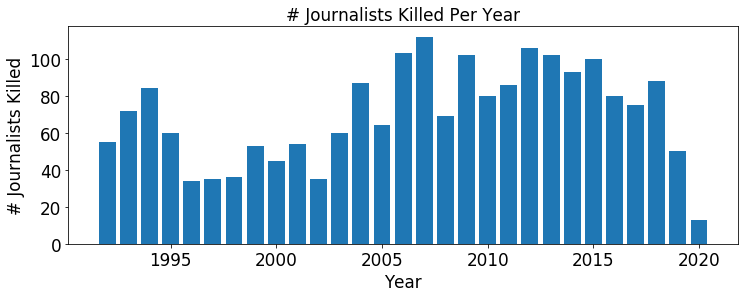

In [54]:
cpj_GB_year_count = cpj.groupby('year').count().reset_index().loc[:,['year','combinedStatus']]
cpj_GB_year_count.rename(columns={'combinedStatus':'Count'},inplace=True)
cpj_GB_year_count.head()

fig, ax = plt.subplots(1,figsize=(12,4))
ax.bar(cpj_GB_year_count['year'],cpj_GB_year_count['Count'])
ax.set_xlabel('Year')
ax.set_ylabel('# Journalists Killed')
ax.set_title('# Journalists Killed Per Year')

plt.savefig('../images/TotalDeathsVsYear.png',bbox_inches='tight')

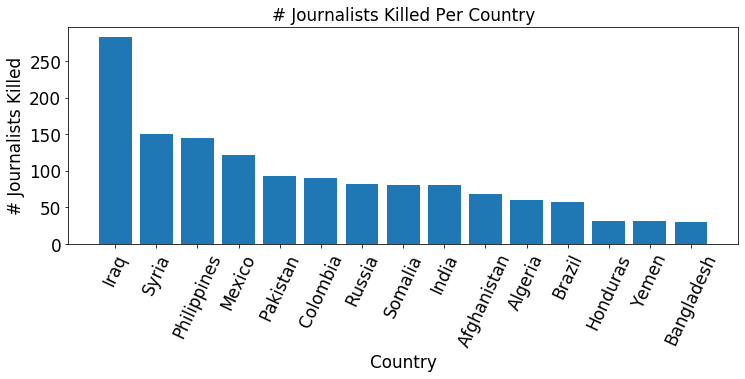

In [63]:
cpj_GB_country_count = cpj.groupby('country').count().reset_index().loc[:,['country','year']].sort_values('year',ascending=False).head(15)
cpj_GB_country_count.rename(columns={'year':'Count'},inplace=True)


fig, ax = plt.subplots(1,figsize=(12,4))
ax.bar(cpj_GB_country_count['country'],cpj_GB_country_count['Count'])
ax.set_xlabel('Country')
ax.set_ylabel('# Journalists Killed')
ax.set_title('# Journalists Killed Per Country')
plt.xticks(rotation=65)

plt.savefig('../images/TotalDeathsByCountry.png',bbox_inches='tight')